# STAT207 Mini-Project #2 - Predictive Modeling for the sales of Video Games

Christy Goon

In [153]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso, LinearRegression

from sklearn.preprocessing import StandardScaler


## 1. Introduction

### <u>Case Study</u>: Predicting sales among the video game industry!
The video game industry has significantly expanded over the past few decades, with the development of new technologies and the growing popularity of gaming platforms. In addition, there are many factors that go into creating games. Sales are crucial analytics for the measuring the success of a game in the industry. More than the details of how much the a video game has sold, what if we can predict the sales of a game based on other similar factors that they share? 
Let's focus on the these five main explanatory variables: 

1. The maximum number of players feature
2. The review score
3. The average time of completing the game in any way
4. The average time of a completionist's run
5. The average time of completing a game's main storyline


As a result, understanding if there is a relationship between sales and these 5 explanatory variables in respect to the average playtime trends of video games has become crucial for sponsors and investors of game development companies to help in predict the sales of a game in an industry contains thousands of products, for the most profitable outcomes. 

### <u>Main Purpose and Target Audience</u>:
The purpose of this project is to help game investors and sponsors understand the if there is any relationship between the sales of a game that is influenced by the review scores, average play times of all play styles, and the maximum number of players in a game. With this information, we can test for a relationship between sales affected by these explanatory variables, and create an accurate predictive model that will work well with new datasets, and therefore new games, to understand the prediction of sales. 

### Research Questions:
1. Build a predictive model that will effectively predict the number of sales for new datasets.

2. Ideally, we would like for our chosen model to also yield reliable interpretative insights
about the nature of the relationship between the variables in the dataset (going through multiple models and finding the highest test R^2, which indicates a stronger predictive power of a model for new datasets).
<hr>

## 2. Dataset Discussion

### <u>Dataset Source</u>:
This dataset was collected by Dr. Joe Cox and downloaded and uploaded to this project on 9/8/2023.
<br>
Here is the link: https://corgis-edu.github.io/corgis/csv/video_games/
to the original view of the dataset.

### <u>Background of the Dataset</u>:
In this context, the Video Games Dataset, originally collected by Dr. Joe Cox, provides valuable insights into the sales and playtime of over a thousand video games released between 2004 and 2010. This dataset encompasses information on the performance of video games, including the rating of a game obtained from crowd-sourced information on "How Long to Beat." This research project aims to use the Video Games Dataset to explore and understand the underlying trends and phenomena in the video game industry, thereby contributing to the knowledge base of video game research and industry practices.

### <u>How to read the dataset</u>:
Here is a link: https://corgis-edu.github.io/corgis/csv/video_games/ to the guide of how to read the full dataset. I focus on explaining the main variables I will be using:
1. Metrics.Sales is the total sales made on this game, measured in millions of dollars.
2. Length.All PlayStyles.Average is the average time players completed the game in any way, in hours.
3. Metrics.Review Score is a typical review score (given by the player) for this game, out of 100.
4. Length.Completionists.Average is the mean time that players reported completing everything in the game, in hours.
5. Length.Main Story.Average is the mean time that players reported completing the main game storyline, in hours.
6. Features.Max Players is the maximum number of players that can play this game.

### <u>Important Notes Using this Data</u>:
It is important to note that since this is crowdsourced data, so the ratings of games may not reflect all community census. In additon, this data is collected from individuals who submit on the "How Long to Beat" website and can be subjected to bias and error in reporting their times for completing a game. These factors are subjected to vary in the community.Therefore, video game investors and sponsors should be aware that the findings do not reflect all game play data, and ratings are subjected to only the players who decide to input their opinions on the game.

In [154]:
#Reading the dataframe into variable df:
df = pd.read_csv("video_games.csv")
#Displaying the first 5 rows:
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [155]:
#Printing the length (number of rows in uncleaned dataset)
print(len(df))

1212


<hr>

## 3. Dataset Cleaning

### Specifying the dataset
In order to create our predictive modeling, let's narrow down and create a new dataframe to display our response and 5 explanatory variables.
This dataset then includes:
#### Response variable
* Metrics.Sales 
#### Explanatory variables
* Length.All PlayStyles.Average 
* Metrics.Review Score 
* Length.Completionists.Average 
* Length.Main Story.Average 
* Features.Max Players 

In [156]:
df = df[["Metrics.Sales","Length.All PlayStyles.Average","Metrics.Review Score","Length.Completionists.Average","Length.Main Story.Average","Features.Max Players"]]
df

,Metrics.Sales,Length.All PlayStyles.Average,Metrics.Review Score,Length.Completionists.Average,Length.Main Story.Average,Features.Max Players
0,4.69,22.716667,85,29.766667,14.333333,1
1,0.56,10.100000,89,0.000000,10.333333,1
2,0.54,4.566667,81,10.000000,1.916667,2
3,0.49,0.000000,81,0.000000,0.000000,1
4,0.45,13.250000,61,72.566667,8.350000,1
...,...,...,...,...,...,...
1207,0.03,10.083333,71,12.050000,8.800000,1
1208,0.03,0.000000,62,0.000000,0.000000,1
1209,0.03,0.000000,51,0.000000,0.000000,1
1210,0.02,10.083333,64,12.050000,8.800000,2


Let's look for any implicit and explicit missing values within the our explanatory and response variables.

In [157]:
#Renaming the columns
df.columns = ["Sales", "Play_Average", "Review_Score", "Completion_Average", "Main_Average", "Players"]
#Checking for data types for implicit cleaning needs
df.dtypes

Sales                 float64
Play_Average          float64
Review_Score            int64
Completion_Average    float64
Main_Average          float64
Players                 int64
dtype: object

In [158]:
#Clearing explicit NA values
df = df.dropna()
df

,Sales,Play_Average,Review_Score,Completion_Average,Main_Average,Players
0,4.69,22.716667,85,29.766667,14.333333,1
1,0.56,10.100000,89,0.000000,10.333333,1
2,0.54,4.566667,81,10.000000,1.916667,2
3,0.49,0.000000,81,0.000000,0.000000,1
4,0.45,13.250000,61,72.566667,8.350000,1
...,...,...,...,...,...,...
1207,0.03,10.083333,71,12.050000,8.800000,1
1208,0.03,0.000000,62,0.000000,0.000000,1
1209,0.03,0.000000,51,0.000000,0.000000,1
1210,0.02,10.083333,64,12.050000,8.800000,2


#### Outlier Cleaning
Now with a cleaned dataset of no implicit and explicit missing data, we shall look at the question of outlier cleaning. For this, we will be focusing on our response variable to determine whether or not we will drop these outliers because we are trying to create a model that predicts the sales of a game.

<Axes: xlabel='Sales'>

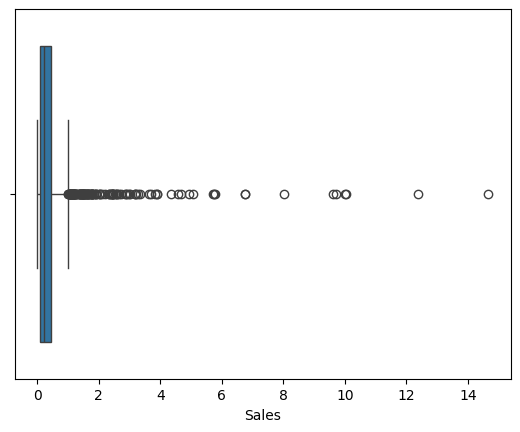

In [159]:
#Visualizing the outliers
sns.boxplot(x=df["Sales"])

In [160]:
#Find the IQR and outliers in the dataset.
print(df["Sales"].quantile(0.75)+(1.5*(df["Sales"].quantile(0.75)-df["Sales"].quantile(0.25))))


1.015


In [161]:
#Calculate how many outliers are in the dataset.
df[df["Sales"] > 1.015]

,Sales,Play_Average,Review_Score,Completion_Average,Main_Average,Players
0,4.69,22.716667,85,29.766667,14.333333,1
22,9.99,10.416667,91,16.383333,4.783333,1
23,9.72,39.383333,83,100.000000,27.966667,1
24,5.07,0.950000,77,1.000000,0.933333,1
25,3.65,13.250000,77,1.000000,7.266667,1
...,...,...,...,...,...,...
875,1.09,30.666667,82,35.000000,23.100000,1
876,1.09,13.150000,66,17.350000,12.800000,1
877,1.07,0.000000,84,0.000000,0.000000,1
878,1.04,15.950000,84,31.116667,8.233333,4


#### Finalizing the decision to keep outliers.

In the end, the predictive model should keep the outliers in the context of this dataset which is going to be used to predict the sales of a game using the explanatory variables Play Average, Review Score,Completion Average,Main Average, and Players. This is because within the gaming industry there are some games that will do outstandingly well in the industry by factors that are outside of our explanatory varaibles, like within marketing, brand deals, and history of a game. 
<br>
<br>
This trend of seeing games that have larger sales is not uncommon, and since these larger sales are expected, it would be sensical to include these outlier values as it is representative of a trend in the industry, instead of the outliers being completely unexpected for our predictive purposes.
<hr>

## 4. Preliminary Analysis

#### Finding Multicolinearity and Transforming Variables
In our dataset, we are now trying to find the best ways of exemplifying and choosing the best representation of variables to predict our response. There will be no need to find an interaction term as this is only between numerical variable relationships.

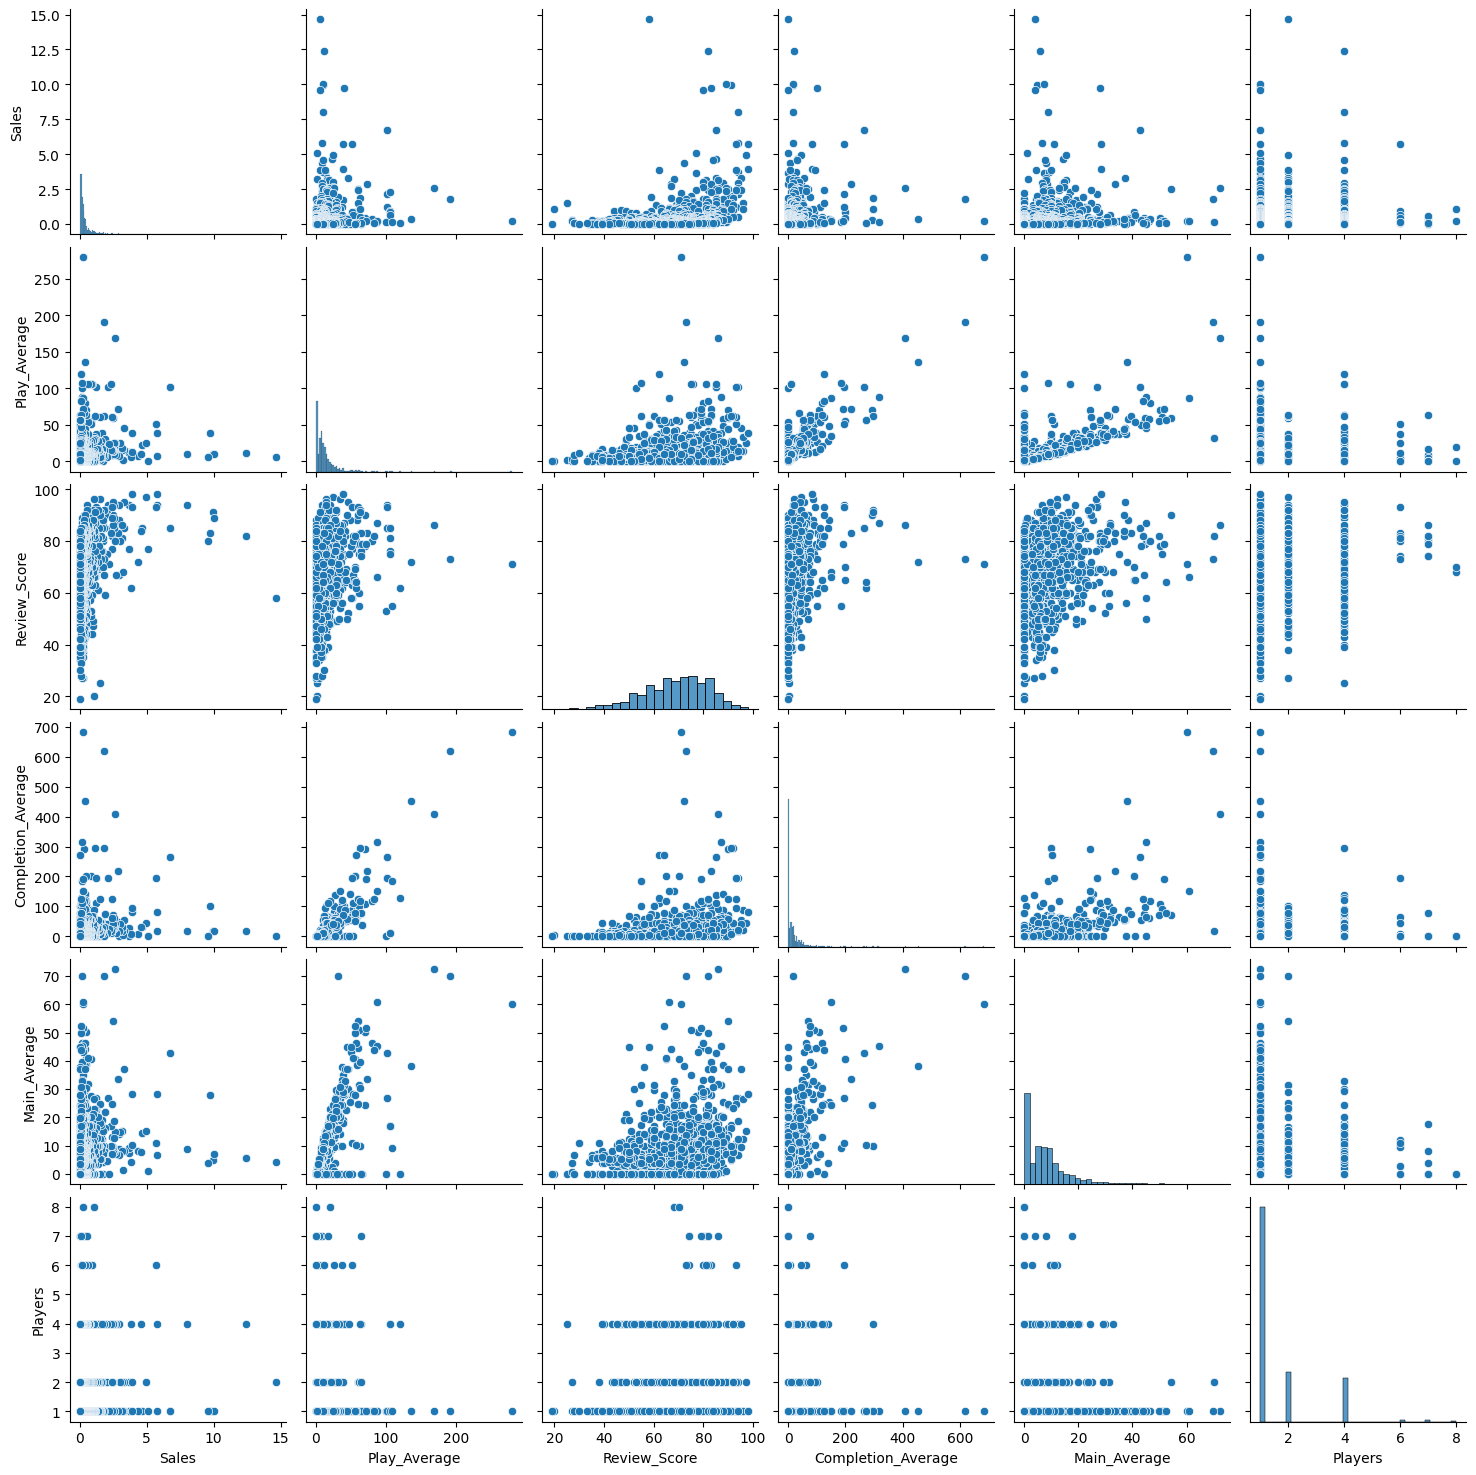

In [162]:
#Finding multicolinear variables
sns.pairplot(df)

In [163]:
#A more technical insight into correlation
df.corr()

,Sales,Play_Average,Review_Score,Completion_Average,Main_Average,Players
Sales,1.000000,0.145171,0.297870,0.179877,0.130097,0.084581
Play_Average,0.145171,1.000000,0.236931,0.822670,0.729582,-0.038211
Review_Score,0.297870,0.236931,1.000000,0.224565,0.277207,0.078635
Completion_Average,0.179877,0.822670,0.224565,1.000000,0.598592,-0.043015
Main_Average,0.130097,0.729582,0.277207,0.598592,1.000000,-0.127983
Players,0.084581,-0.038211,0.078635,-0.043015,-0.127983,1.000000


In [164]:
#Fitting full model
import statsmodels.formula.api as smf
formula = 'Sales ~ Play_Average + Review_Score + Completion_Average + Main_Average + Players'
full = smf.ols(formula = formula, data=df).fit()
full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     29.13
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           5.57e-28
Time:                        22:08:11   Log-Likelihood:                -1732.0
No. Observations:                1212   AIC:                             3476.
Df Residuals:                    1206   BIC:                             3507.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1542      0.161     -7.156      0.000      -1.471      -0.838
Play_Average          -0.0031      0.003     -1.010      0.313      -0.009       0.003
Review_Score           0.0220      0.002      9.327      0.000       0.017       0.027
Completion_Average     0.0038      0.001      3.444      0.001       0.002       0.006
Main_Average           0.0008      0.005      0.188      0.851      -0.008       0.010
Players                0.0618      0.025      2.509      0.012       0.013       0.110
==============================================================================
Omnibus:                     1586.904   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           263224.054
Skew:                           7.045   Prob(JB):                         0.00
Kurtosis:                      73.808   Cond. No.                         433.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

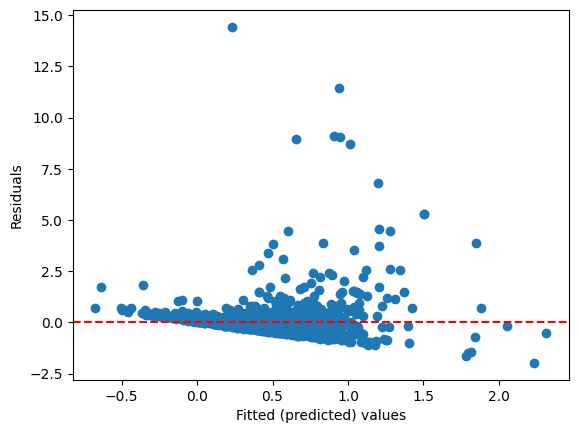

In [165]:
#Testing linearity in the full model
plt.scatter(full.fittedvalues, full.resid)
plt.xlabel('Fitted (predicted) values')
plt.ylabel('Residuals')

residuals = full.resid
mean_residual = residuals.mean()
plt.axhline(y=mean_residual, color = "r", linestyle = "--")
plt.show()


This does not fit the linearity assumption because if we were to block the residuals, there would not be an evenly dispersed amount of negative and positive residuals. As a result, let's try to transform the model to fit linearity assumption better.

In [166]:
df1 = df.copy()
df1["sqrt"] = np.sqrt(df["Completion_Average"])

In [167]:
l1 = smf.ols(formula = 'Sales ~ Play_Average + Review_Score + sqrt + Main_Average + Players', data=df1).fit()
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     30.94
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.08e-29
Time:                        22:08:11   Log-Likelihood:                -1727.9
No. Observations:                1212   AIC:                             3468.
Df Residuals:                    1206   BIC:                             3498.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.1197      0.161     -6.945      0.000      -1.436      -0.803
Play_Average    -0.0016      0.003     -0.629      0.530      -0.007       0.003
Review_Score     0.0203      0.002      8.470      0.000       0.016       0.025
sqrt             0.0597      0.013      4.473      0.000       0.033       0.086
Main_Average    -0.0035      0.005     -0.754      0.451      -0.012       0.006
Players          0.0637      0.025      2.594      0.010       0.016       0.112
==============================================================================
Omnibus:                     1595.693   Durbin-Watson:                   0.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           271781.417
Skew:                           7.108   Prob(JB):                         0.00
Kurtosis:                      74.970   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

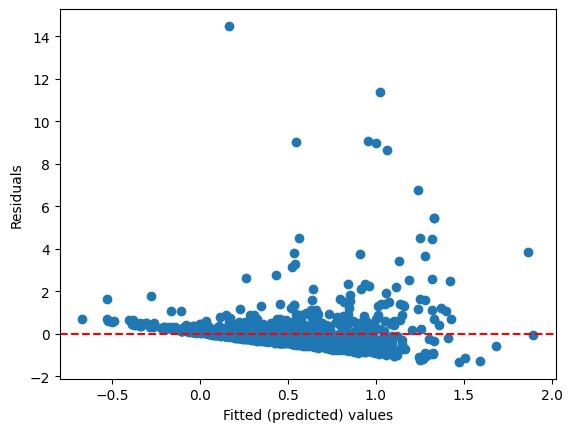

In [168]:
plt.scatter(l1.fittedvalues, l1.resid)
plt.xlabel('Fitted (predicted) values')
plt.ylabel('Residuals')

residuals = l1.resid
mean_residual = residuals.mean()
plt.axhline(y=mean_residual, color = "r", linestyle = "--")
plt.show()

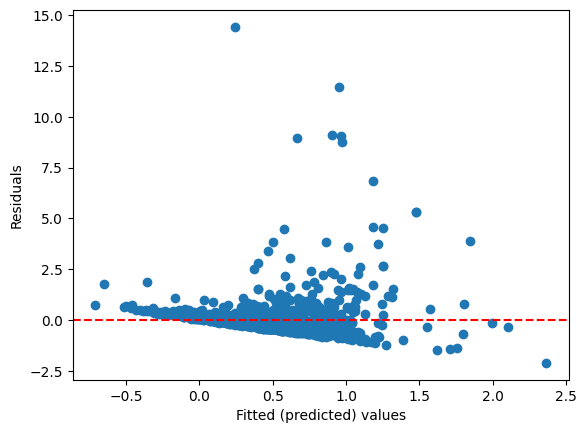

In [169]:
df1["sqrt"] = np.sqrt(df1["Play_Average"])
l2 = smf.ols(formula = 'Sales ~ sqrt + Review_Score + Completion_Average + Main_Average + Players', data=df1).fit()
l2.summary()
plt.scatter(l2.fittedvalues, l2.resid)
plt.xlabel('Fitted (predicted) values')
plt.ylabel('Residuals')

residuals = l2.resid
mean_residual = residuals.mean()
plt.axhline(y=mean_residual, color = "r", linestyle = "--")
plt.show()

#### Conclusions with Transformations 
By testing multiple transformations, we see that the model does not fit the linearity assumption. We can see that a linear regression is not the best at predicting the sales of a game based on the variables, therefore other models will be better suited for predicting sales.
<hr>

## 5. Predictive Models

#### Fitting our Test-Test Train Models
Now that we see that linear regression modeling is not the best predictive we shall try to create predictive modeling with other models.

In [170]:
#Fitting a train-test-split for training a data set
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.80,random_state=207)

In [171]:
formula = 'Sales ~ Play_Average + Review_Score + Completion_Average + Main_Average + Players'
l = smf.ols(formula = formula, data=df_train).fit()
l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     12.50
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           8.91e-11
Time:                        22:08:12   Log-Likelihood:                -270.48
No. Observations:                 242   AIC:                             553.0
Df Residuals:                     236   BIC:                             573.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8545      0.276     -3.096      0.002      -1.398      -0.311
Play_Average          -0.0014      0.005     -0.288      0.773      -0.011       0.008
Review_Score           0.0168      0.004      4.168      0.000       0.009       0.025
Completion_Average     0.0064      0.002      3.640      0.000       0.003       0.010
Main_Average          -0.0011      0.007     -0.151      0.880      -0.016       0.014
Players                0.0480      0.040      1.209      0.228      -0.030       0.126
==============================================================================
Omnibus:                      181.083   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2261.739
Skew:                           2.881   Prob(JB):                         0.00
Kurtosis:                      16.824   Cond. No.                         447.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Creating Feature Matrix and Target Array

In [179]:
#Features Matrix and Target Array 
x_train = df_train.drop(['Sales'], axis = 1)
y_train = df_train['Sales']
x_test = df_test.drop(['Sales'], axis = 1)
y_test = df_test['Sales']


#### Scaling the Training Features Matrix
Z-score scale each of the values in your TRAINING features matrix using the corresponding TRAINING data column means and standard deviations.

In [180]:
scaler = StandardScaler()

scaled_ex_var = scaler.fit_transform(x_train) 

x_train = pd.DataFrame(scaled_ex_var, columns=x_train.columns)
x_train.head()



,Play_Average,Review_Score,Completion_Average,Main_Average,Players
0,4.956999,0.458134,-0.263410,0.890721,-0.559526
1,-0.100823,-0.616024,-0.081023,0.329055,0.241689
2,-0.149464,0.074506,-0.043472,0.186465,-0.559526
3,2.602387,1.071939,1.366109,3.239981,-0.559526
4,0.309027,-1.613457,-0.015825,-0.882961,-0.559526


#### Scaling the Test Features Matrix
Z-score scale each of the values in your TEST features matrix using the corresponding TRAINING data column means and standard deviations.

In [181]:
scaled_ex_var = scaler.transform(x_test) 

x_test = pd.DataFrame(scaled_ex_var, columns=x_test.columns)
x_test.head()

,Play_Average,Review_Score,Completion_Average,Main_Average,Players
0,-0.694430,0.151232,-0.510994,-0.733415,-0.559526
1,-0.380962,-1.229829,-0.058327,-0.328250,-0.559526
2,0.463960,0.227957,0.405068,0.885505,-0.559526
3,-0.053983,-0.078945,-0.175517,0.473384,-0.559526
4,-0.409787,0.151232,-0.192848,-0.394329,-0.559526


In [182]:
x_train.corr()

,Play_Average,Review_Score,Completion_Average,Main_Average,Players
Play_Average,1.000000,0.341242,0.725959,0.715328,0.073164
Review_Score,0.341242,1.000000,0.356553,0.344990,0.033305
Completion_Average,0.725959,0.356553,1.000000,0.523323,0.052452
Main_Average,0.715328,0.344990,0.523323,1.000000,-0.101118
Players,0.073164,0.033305,0.052452,-0.101118,1.000000


There is an issue with multicolinearilty because we have multiple variables that show strong positive correlations (>0.70) with each other(Play_Average & Completion Average, Main_Average & Play_Average), which can affect the true relationship between balance and other variables.

#### 5.1. Non-Regularized Linear Regression Full Model

In [183]:
#Training the model
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(x_train,y_train)

LinearRegression()

In [184]:
#Calculate the test R^2 of the model
lin_reg_mod.score(x_test,y_test)

0.07284751358320096

After seeing our test R^2, we can see that the model has very poor predictive power when predicting sales. Instead, we will try regularization which attempts to find the best predictive models among different lambda values for different model types. We will use this method because in part 4, we discussed that a Linear Regression is not the best representative model of this dataset.

#### LASSO Linear Regression Models

In [189]:
lam_val=[]
for i in np.arange(0,0.5,0.05):
    model = Lasso(alpha=i, max_iter=1000)
    model.fit(x_train,y_train)
    r2 = model.score(x_test,y_test)
    lam_val.append([i,r2])
df_output = pd.DataFrame(lam_val, columns=['lambda','test_r2'])
df_output

C:\Users\Christy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Christy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Christy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or cons

,lambda,test_r2
0,0.00,0.072848
1,0.05,0.072169
2,0.10,0.069198
3,0.15,0.061874
4,0.20,0.048350
5,0.25,0.028626
6,0.30,0.004713
7,0.35,-0.000127
8,0.40,-0.000127
9,0.45,-0.000127


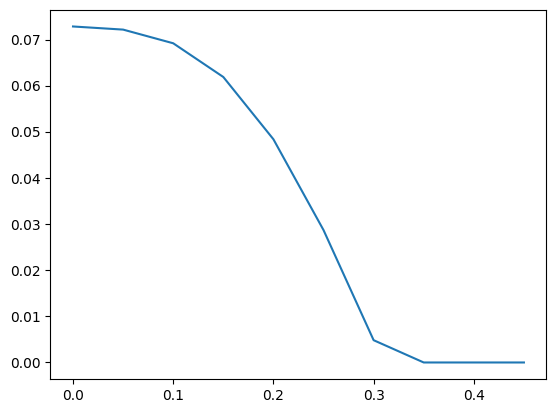

In [190]:
#Graphing the relationship between lambda and Test R^2
plt.plot(df_output['lambda'].values, df_output['test_r2'].values)


In [191]:
#Finding the best LASSO linear regression model
df_output[df_output['test_r2'] == df_output["test_r2"].max()]

,lambda,test_r2
0,0.0,0.072848


The first model of lambda value 0 is the best iteration because it has the highest test r2 score of 0.072848, sugguesting it performs the best to predicting Sales of new datasets compared to the rest of the LASSO linear regression models. This is around the same test r2 as our regularized linear regression model 0.072847, but slighlty better by 0.000001.

#### Linear Ridge Regression Models

In [192]:
lam_val=[]
for i in np.arange(0,401,1):
    model = Ridge(alpha=i, max_iter=1000)
    model.fit(x_train,y_train)
    r2 = model.score(x_test,y_test)
    lam_val.append([i,r2])
df_output = pd.DataFrame(lam_val, columns=['lambda','test_r2'])
df_output

,lambda,test_r2
0,0,0.072848
1,1,0.072969
2,2,0.073084
3,3,0.073192
4,4,0.073295
...,...,...
396,396,0.059990
397,397,0.059952
398,398,0.059913
399,399,0.059875


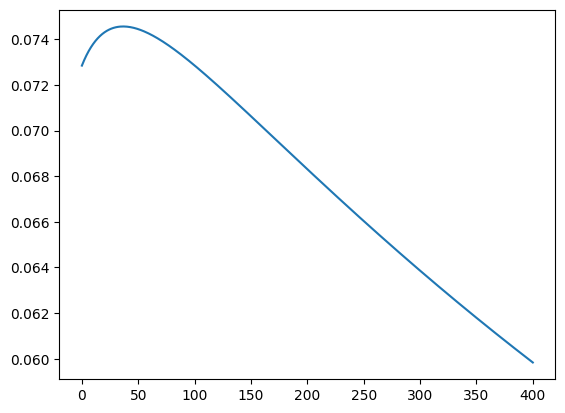

In [193]:
#Plot the relationship of lambda values and R^2
plt.plot(df_output['lambda'].values, df_output['test_r2'].values)

In [194]:
df_output[df_output['test_r2'] == df_output["test_r2"].max()]

,lambda,test_r2
37,37,0.074563


The best ridge regression model for predicting sales  is the model with lambda value of 37 and a the highest test r2 value of 0.074563 compared to all other candidate ridge regression models. This is slightly better than our regularized regression model of 0.072847
<hr>

## 6. Best Model Discussion

So our final best predictive model for new datasets is the ridge model with the test R^2 score of 0.074563

In [199]:
#Finding the slopes of the equation
best_model = Ridge(alpha=37).fit(x_train,y_train)
coef = best_model.coef_
variable = x_train.columns
sdf = pd.DataFrame(coef.T, index = variable)
sdf

,0
Play_Average,0.016491
Review_Score,0.193070
Completion_Average,0.202926
Main_Average,-0.002448
Players,0.053348


In [200]:
#Finding the intercept of the equation
best_model.intercept_

0.49305785123966944

Equation:
<br>
Sales(hat) = 0.016491[Play_Average] + 0.193070[Review_Score] + 0.202926[Completion_Average] - 0.002448[Main_Average] + 0.053348[Players]


For how well the overall fit is of the best model, it is relatively poor as it is still 0.074563 which is still a small number.

Due to the similarities between our variables' standard deviation, it's likely that our interpretation of the slope magnitudes of the explanatory variables will be representative of the Ridge Model.

In [202]:
best_ridge = Ridge(alpha = 37,max_iter=1000)
best_ridge.fit(x_train,y_train)
best_lasso = Lasso(alpha = 0,max_iter=1000)
best_lasso.fit(x_train,y_train)
df_slopes = pd.DataFrame({
    'lin_reg_mod':lin_reg_mod.coef_.T,
    'best_lasso': best_lasso.coef_.T,
    'best_ridge': best_ridge.coef_.T
    }, index = x_train.columns)
df_slopes

C:\Users\Christy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Christy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Christy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or cons

,lin_reg_mod,best_lasso,best_ridge
Play_Average,-0.024988,-0.024988,0.016491
Review_Score,0.219532,0.219532,0.193070
Completion_Average,0.258644,0.258644,0.202926
Main_Average,-0.010777,-0.010777,-0.002448
Players,0.059893,0.059893,0.053348


In [203]:
df_slopes["Slope Reduction Ratio"] = df_slopes["best_ridge"]/df_slopes['lin_reg_mod']
df_slopes

,lin_reg_mod,best_lasso,best_ridge,Slope Reduction Ratio
Play_Average,-0.024988,-0.024988,0.016491,-0.659954
Review_Score,0.219532,0.219532,0.193070,0.879461
Completion_Average,0.258644,0.258644,0.202926,0.784577
Main_Average,-0.010777,-0.010777,-0.002448,0.227113
Players,0.059893,0.059893,0.053348,0.890721


The most predictive power is given to the slopes of Players and Review_Score because they have the highest ratios compared to other explanatory variables.

## 7. Conclusion

#### Recommendation
The best predictive Ridge model should be used with caution when interpreting and predicting sales. This is because of the issues with relatively low R^2 score, despite it being comparatively better than the other regularized models. Because of this, a investor and sponsor of these games should realize that the model, although comparatively better than the linear regression, will not yield a high predictive power.

#### Shortcomings and caveats
Some of the shortcomings of our dataset include the model testing methods, the number of variables, and the input of outliers. Because of this, the model will be better at predicting games with outlier sale values, but can perform poorly when evaluating datasets with a majority in the normalized IQR. The model also does not test backward or foreward selection algorithms which can give some insight into the predictive variables and the adjusted R^2, which accounts for the overall predictive power in relation to general models.

#### Future Work 
Based on my work above, another potential problem we can try to explore is the use of predictive power on the gaming industry as we can use it to predict the review score of a game based upon genre and online features of a video game the relationships seen in the sales. These different variables may be able to create a better relationship and understanding of the predictive powers of a model, and can help investors and sponsors of video games also understand the publicity of a game in relation to both categorical and numerical variables. 

<hr>